<a href="https://colab.research.google.com/github/ranga-godhandaraman/text-embedding/blob/main/text_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install PyMuPDF nltk sentence-transformers matplotlib

In [ ]:
import os

pdf1_path = '/content/drive/MyDrive/embedding/pdf1.pdf'
pdf2_path = '/content/drive/MyDrive/embedding/pdf2.pdf'

## Extracting Text from PDFs

In [ ]:
import fitz  # PyMuPDF

def extract_text_from_pdf(pdf_path):
    text = ""
    with fitz.open(pdf_path) as pdf:
        for page_num in range(pdf.page_count):
            page = pdf.load_page(page_num)
            text += page.get_text()
    return text

In [ ]:
pdf1_text = extract_text_from_pdf(pdf1_path)
pdf2_text = extract_text_from_pdf(pdf2_path)

In [ ]:
pdf1_text

' \n \n1 \n \nIndian Geography for General Studies UPSC Civil Services Exam by Pmfias.com \n \nWebsites: https://www.pmfias.com and https://store.pmfias.com \nFacebook Page: https://www.facebook.com/PoorMansFriend2485 \nYouTube: https://www.youtube.com/c/poormansfriend \nNewsletter: https://www.pmfias.com/newsletters \nPDF \n1. \nIndia as a Geographical Unit \n......................................................................................................................... 4 \n1.2 India\'s Frontiers ........................................................................................................................................................................... \n7 \n1.3 Major Physical Divisions of India ....................................................................................................................................... 10 \n2. \nRock System Based on Geological History of India..............................................................................

In [ ]:
pdf2_text

'HISTORY\n1\nMODULE - 1\nAncient India\nUNDERSTANDING INDIAN HISTORY\n1\nNotes\nHistory is the study of past events. It helps us to understand those processes that\nenabled the early humans to successfully conquer their environment and develop the\npresent day civilizations. It is not just a study of battles and kings as is normally\nunderstood by some. It is an analysis of society, economy and cultural trends over a\nlong period as reflected in  available sources. A historian tries to evaluate different\nsituations over a long period and asks questions as to why certain events happened\nand what was their impact on society at large? Every new evidence or a fresh inter-\npretation of existing evidence by different scholars helps in enriching our knowledge\nabout the past. A historian differentiates between fact and fiction. However , myths\nwhich are based on oral tradition of a society may contain memories of past happen-\nings. The historian’s job is to ascertain the fact through cro

## Chunking the Text

In [ ]:
import nltk
nltk.download('punkt')

def chunk_text(text, chunk_size=100):
    sentences = nltk.sent_tokenize(text)
    chunks = []
    current_chunk = []
    current_length = 0

    for sentence in sentences:
        current_chunk.append(sentence)
        current_length += len(sentence.split())

        if current_length >= chunk_size:
            chunks.append(' '.join(current_chunk))
            current_chunk = []
            current_length = 0

    if current_chunk:
        chunks.append(' '.join(current_chunk))

    return chunks

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
chunks1 = chunk_text(pdf1_text)
chunks2 = chunk_text(pdf2_text)

## Generating Embeddings

In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')

def generate_embeddings(chunks):
    embeddings = model.encode(chunks)
    return embeddings

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
embeddings1 = generate_embeddings(chunks1)
embeddings2 = generate_embeddings(chunks2)

In [ ]:
embeddings1

array([[ 0.04802219, -0.054953  , -0.03053146, ..., -0.03990014,
        -0.07048697,  0.02478147],
       [ 0.01725543,  0.01324911, -0.04115315, ..., -0.03312329,
        -0.02998547,  0.07021233],
       [ 0.02689483, -0.02652764, -0.00902573, ...,  0.0061888 ,
         0.04424977, -0.00922993],
       ...,
       [-0.02545029,  0.00728387,  0.07598837, ..., -0.02116345,
         0.0023101 ,  0.01400078],
       [ 0.00240877,  0.00742788,  0.05330929, ...,  0.00622184,
         0.03545297, -0.0389818 ],
       [-0.00172699,  0.00587065,  0.05092539, ...,  0.01470295,
         0.03012691, -0.04256833]], dtype=float32)

In [ ]:
embeddings2

array([[-0.01857909,  0.07761049, -0.04901772, ...,  0.05623965,
        -0.06419193, -0.01374392],
       [-0.04888358,  0.07194493, -0.01934775, ...,  0.07295857,
        -0.02544283,  0.01627051],
       [-0.08226209,  0.07552034, -0.0114102 , ...,  0.06934065,
        -0.03779249,  0.01838098],
       ...,
       [ 0.03864016,  0.03924046,  0.02649667, ...,  0.01387397,
         0.04373417, -0.02846712],
       [ 0.02731825,  0.03469858, -0.04457578, ...,  0.11070062,
        -0.0285073 , -0.0088137 ],
       [ 0.00094922,  0.01957139, -0.11367653, ...,  0.0769738 ,
         0.06278503,  0.02754748]], dtype=float32)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


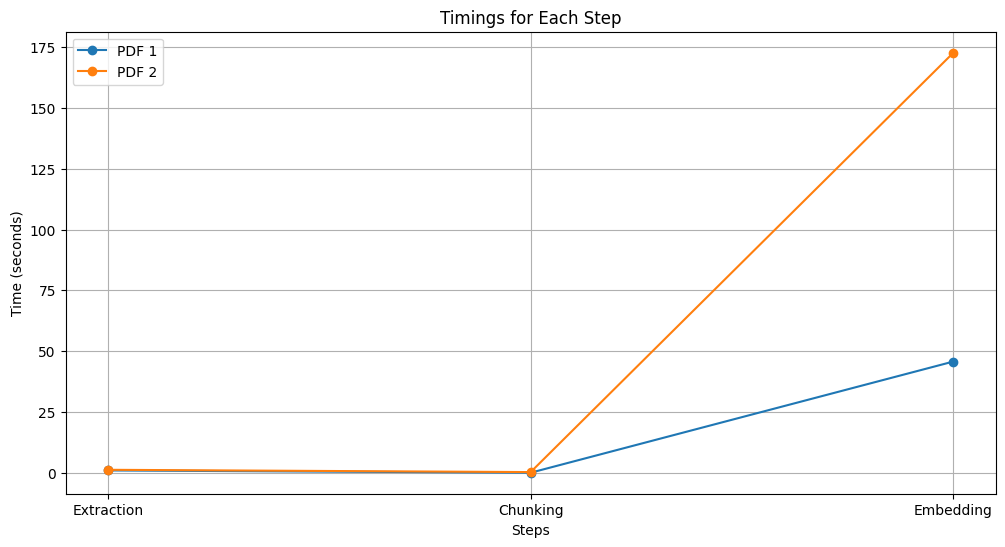

In [ ]:
import fitz  # PyMuPDF
import nltk
import time
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer

nltk.download('punkt')

def extract_text_from_pdf(pdf_path):
    start_time = time.time()
    text = ""
    with fitz.open(pdf_path) as pdf:
        for page_num in range(pdf.page_count):
            page = pdf.load_page(page_num)
            text += page.get_text()
    end_time = time.time()
    return text, end_time - start_time

def chunk_text(text, chunk_size=100):
    start_time = time.time()
    sentences = nltk.sent_tokenize(text)
    chunks = []
    current_chunk = []
    current_length = 0

    for sentence in sentences:
        current_chunk.append(sentence)
        current_length += len(sentence.split())

        if current_length >= chunk_size:
            chunks.append(' '.join(current_chunk))
            current_chunk = []
            current_length = 0

    if current_chunk:
        chunks.append(' '.join(current_chunk))

    end_time = time.time()
    return chunks, end_time - start_time

def generate_embeddings(chunks):
    start_time = time.time()
    model = SentenceTransformer('all-MiniLM-L6-v2')
    embeddings = model.encode(chunks)
    end_time = time.time()
    return embeddings, end_time - start_time

def plot_timings_line(timings_list, labels, titles):
    plt.figure(figsize=(12, 6))
    for i, timings in enumerate(timings_list):
        plt.plot(labels, timings, marker='o', label=titles[i])

    plt.xlabel('Steps')
    plt.ylabel('Time (seconds)')
    plt.title('Timings for Each Step')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage

pdf1_path = '/content/drive/MyDrive/embedding/pdf1.pdf'
pdf2_path = '/content/drive/MyDrive/embedding/pdf2.pdf'

# Timing for PDF 1
pdf1_text, pdf1_extraction_time = extract_text_from_pdf(pdf1_path)
pdf1_chunks, pdf1_chunking_time = chunk_text(pdf1_text)
pdf1_embeddings, pdf1_embedding_time = generate_embeddings(pdf1_chunks)

# Timing for PDF 2
pdf2_text, pdf2_extraction_time = extract_text_from_pdf(pdf2_path)
pdf2_chunks, pdf2_chunking_time = chunk_text(pdf2_text)
pdf2_embeddings, pdf2_embedding_time = generate_embeddings(pdf2_chunks)

# Collect timings
timings_pdf1 = [pdf1_extraction_time, pdf1_chunking_time, pdf1_embedding_time]
timings_pdf2 = [pdf2_extraction_time, pdf2_chunking_time, pdf2_embedding_time]
labels = ['Extraction', 'Chunking', 'Embedding']
titles = ['PDF 1', 'PDF 2']

# Plot timings for both PDFs
plot_timings_line([timings_pdf1, timings_pdf2], labels, titles)
